In [1]:
# Importando bibliotecas utilizadadas 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import glob
import os

In [2]:
low_memory = False
sns.set()
pd.set_option("display.max_columns", 63)
pd.set_option("display.max_rows", 100)

In [3]:
#Concatenação dos arquivos .csv pertencentes a região Sudeste.

path = r'C:\Users\Guilherme\Desktop\Data\SUDESTE' # Caminho para arquivos
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 
    li.append(df)

sudeste = pd.concat(li, axis=0, ignore_index=True)

In [4]:
sudeste.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:20:12,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,57053,VITÓRIA,57053,VITÓRIA,52,13,Vereador,80000805832,12123,GILSON ANTUNES,GILSON ANTUNES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,80000079771,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,12
1,29/11/2020,10:20:12,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,56413,ECOPORANGA,56413,ECOPORANGA,33,13,Vereador,80001121783,19123,LORRANE RODRIGUES RIBEIRO,LORRANE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,19,PODE,Podemos,80000135995,PARTIDO ISOLADO,PODE,4,NÃO ELEITO,N,7
2,29/11/2020,10:20:12,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,56979,SÃO MATEUS,56979,SÃO MATEUS,21,13,Vereador,80001236654,17003,JESSICA PEREIRA FERREIRA,JESSICA JELL,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,17,PSL,Partido Social Liberal,80000152922,PARTIDO ISOLADO,PSL,5,SUPLENTE,N,162
3,29/11/2020,10:20:12,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,56111,ARACRUZ,56111,ARACRUZ,20,13,Vereador,80001166362,18000,ELIZEU DA COSTA PEREIRA,ELIZEU COSTA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,18,REDE,Rede Sustentabilidade,80000143654,PARTIDO ISOLADO,REDE,4,NÃO ELEITO,N,594
4,29/11/2020,10:20:12,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,56510,ICONHA,56510,ICONHA,35,13,Vereador,80000660258,18123,FABIO LOPES DALBOM,FABIO DALBOM,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,18,REDE,Rede Sustentabilidade,80000058914,PARTIDO ISOLADO,REDE,2,ELEITO POR QP,N,381


In [5]:
sudeste_mais_votados_2020 = sudeste[sudeste['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

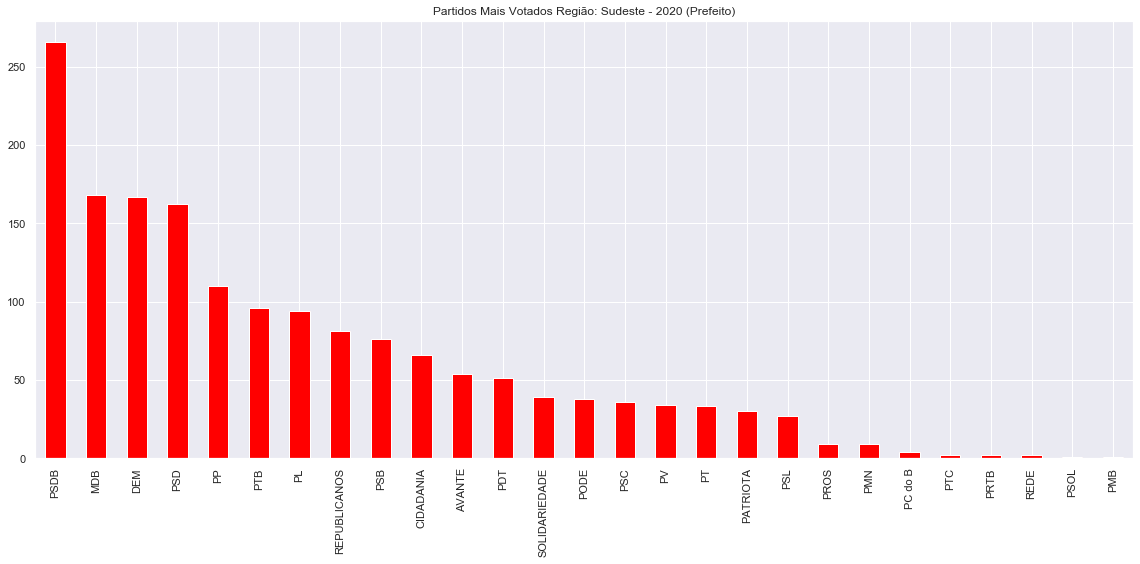

In [6]:
sudeste_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', color=['Red'], figsize=(16,8), title=f'Partidos Mais Votados Região: Sudeste - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Sudeste 2020.png', dpi=300)

In [7]:
#Concatenação dos arquivos .csv pertencentes a região Norte.

path = r'C:\Users\Guilherme\Desktop\Data\NORTE' # Caminho para arquivos
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 
    li.append(df)

norte = pd.concat(li, axis=0, ignore_index=True)

In [8]:
norte.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:19:32,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1473,TARAUACÁ,1473,TARAUACÁ,5,13,Vereador,10001251888,13444,ROSA MARIA DA SILVA LIMA,ROSA DO PT,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,13,PT,Partido dos Trabalhadores,10000155397,PARTIDO ISOLADO,PT,4,NÃO ELEITO,N,55
1,29/11/2020,10:19:32,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,1,13,Vereador,10000701206,90364,MARCELO DA SILVA COSTA,MARCELO DO LIBERDADE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,90,PROS,Partido Republicano da Ordem Social,10000065026,PARTIDO ISOLADO,PROS,4,NÃO ELEITO,N,272
2,29/11/2020,10:19:32,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1090,MÂNCIO LIMA,1090,MÂNCIO LIMA,4,13,Vereador,10000704962,65777,ROBERIA LIMA CAVALCANTE MACEDO,ROBERIA CAVALCANTE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,65,PC do B,Partido Comunista do Brasil,10000065430,PARTIDO ISOLADO,PC do B,4,NÃO ELEITO,N,72
3,29/11/2020,10:19:32,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1139,FEIJÓ,1139,FEIJÓ,7,13,Vereador,10001014323,55113,SÂMIA DE SOUZA DOURADO,SAMIA DOURADO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,55,PSD,Partido Social Democrático,10000119672,PARTIDO ISOLADO,PSD,5,SUPLENTE,N,146
4,29/11/2020,10:19:32,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1058,BRASILÉIA,1058,BRASILÉIA,6,13,Vereador,10001212796,15120,LUCINETE SEVERIANA DE MOURA,NETE DA GRÁFICA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,MDB,Movimento Democrático Brasileiro,10000149259,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,8


In [9]:
norte_mais_votados_2020 = norte[norte['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

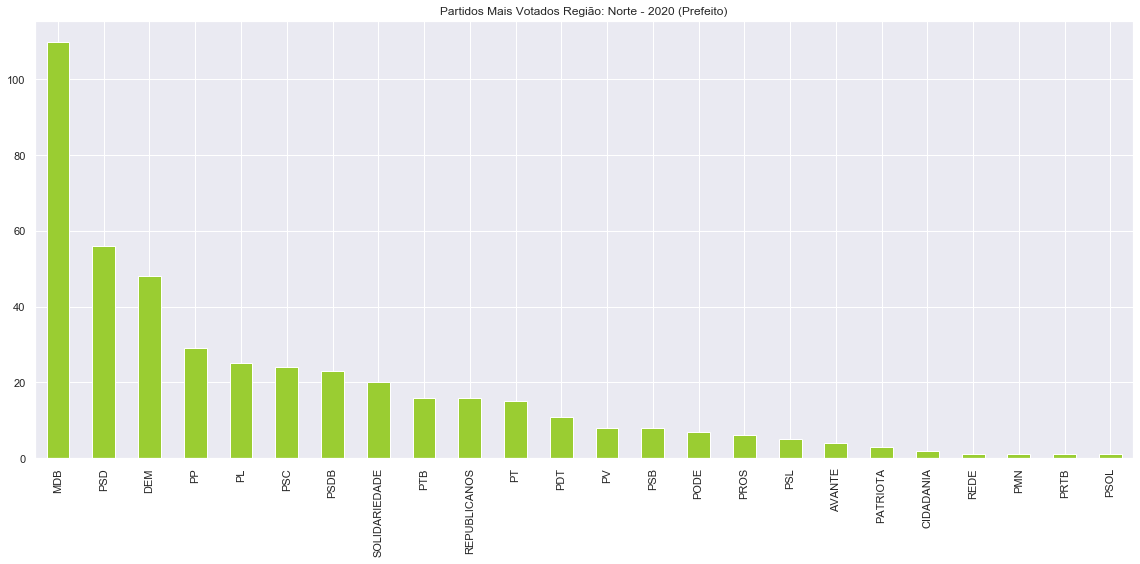

In [10]:
norte_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', color= ['YellowGreen'], figsize=(16,8), title=f'Partidos Mais Votados Região: Norte - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Norte 2020.png', dpi=300)

In [11]:
#Concatenação dos arquivos .csv pertencentes a região Nordeste.

path = r'C:\Users\Guilherme\Desktop\Data\NORDESTE' # Caminho para arquivos
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 
    li.append(df)

nordeste = pd.concat(li, axis=0, ignore_index=True)

In [12]:
nordeste.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:19:42,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AL,27618,IGACI,27618,IGACI,45,13,Vereador,20000817391,11789,VERÔNICA PAULINO SILVA,VERA DO PEIXE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,11,PP,PROGRESSISTAS,20000085154,PARTIDO ISOLADO,PP,5,SUPLENTE,N,23
1,29/11/2020,10:19:42,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AL,27855,MACEIÓ,27855,MACEIÓ,2,13,Vereador,20001040630,36456,CLAUDEVAN CARDOSO DA SILVA,DAI RESTAURANTE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,36,PTC,Partido Trabalhista Cristão,20000125605,PARTIDO ISOLADO,PTC,5,SUPLENTE,N,33
2,29/11/2020,10:19:42,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AL,27855,MACEIÓ,27855,MACEIÓ,2,13,Vereador,20000823797,55500,HEMERSON CASADO GAMA,HEMERSON CASADO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,55,PSD,Partido Social Democrático,20000086347,PARTIDO ISOLADO,PSD,5,SUPLENTE,N,595
3,29/11/2020,10:19:42,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AL,28711,SÃO MIGUEL DOS CAMPOS,28711,SÃO MIGUEL DOS CAMPOS,18,13,Vereador,20000699346,15250,ELENILDO DOS SANTOS COSTA,LÉO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,MDB,Movimento Democrático Brasileiro,20000064849,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,70
4,29/11/2020,10:19:42,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AL,28215,OURO BRANCO,28215,OURO BRANCO,50,13,Vereador,20001248468,15333,ROBERIO TAVARES DO NASCIMENTO,BERO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,15,MDB,Movimento Democrático Brasileiro,20000154841,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,56


In [13]:
nordeste_mais_votados_2020 = nordeste[nordeste['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

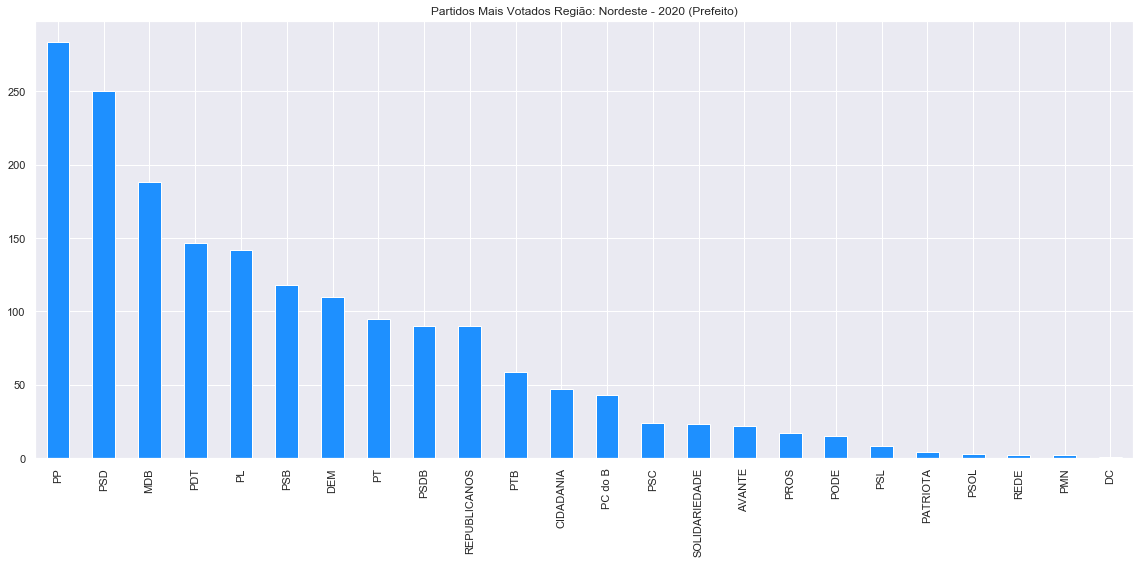

In [14]:
nordeste_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', color=['DodgerBlue'], figsize=(16,8), title=f'Partidos Mais Votados Região: Nordeste - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Nordeste 2020.png', dpi=300)

In [15]:
#Concatenação dos arquivos .csv pertencentes a região Centro-Oeste.

path = r'C:\Users\Guilherme\Desktop\Data\CENTRO OESTE' # Caminho para arquivos
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 
    li.append(df)

centro_oeste = pd.concat(li, axis=0, ignore_index=True)

In [16]:
centro_oeste.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:20:18,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,GO,93343,ÁGUAS LINDAS DE GOIÁS,93343,ÁGUAS LINDAS DE GOIÁS,28,13,Vereador,90001142401,25190,EDMILSON SERAFIM BEZERRA,SGT. SERAFIM,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,25,DEM,Democratas,90000138593,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,297
1,29/11/2020,10:20:18,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,GO,93734,GOIÂNIA,93734,GOIÂNIA,1,13,Vereador,90000916804,36444,ADEDIAS LEOPOLDINO DE SOUSA,ADEDIAS DO TRANSPORTE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,36,PTC,Partido Trabalhista Cristão,90000105342,PARTIDO ISOLADO,PTC,5,SUPLENTE,N,1
2,29/11/2020,10:20:18,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,GO,93734,GOIÂNIA,93734,GOIÂNIA,134,13,Vereador,90001220594,45100,GISCARD DE ESTAING DE MENEZES,GISCARD DE ESTAING,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,90000150422,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,29
3,29/11/2020,10:20:18,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,GO,93734,GOIÂNIA,93734,GOIÂNIA,2,13,Vereador,90000916001,12002,ARIANA SANTANA DA ABADIA,ARIANA SANTANA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,90000105239,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,8
4,29/11/2020,10:20:18,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,GO,94137,ITAPACI,94137,ITAPACI,39,13,Vereador,90001246802,19777,ELENICE PEREIRA DO LAGO,ELENICE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,19,PODE,Podemos,90000154591,PARTIDO ISOLADO,PODE,4,NÃO ELEITO,N,24


In [17]:
centro_oeste_mais_votados_2020 = centro_oeste[centro_oeste['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

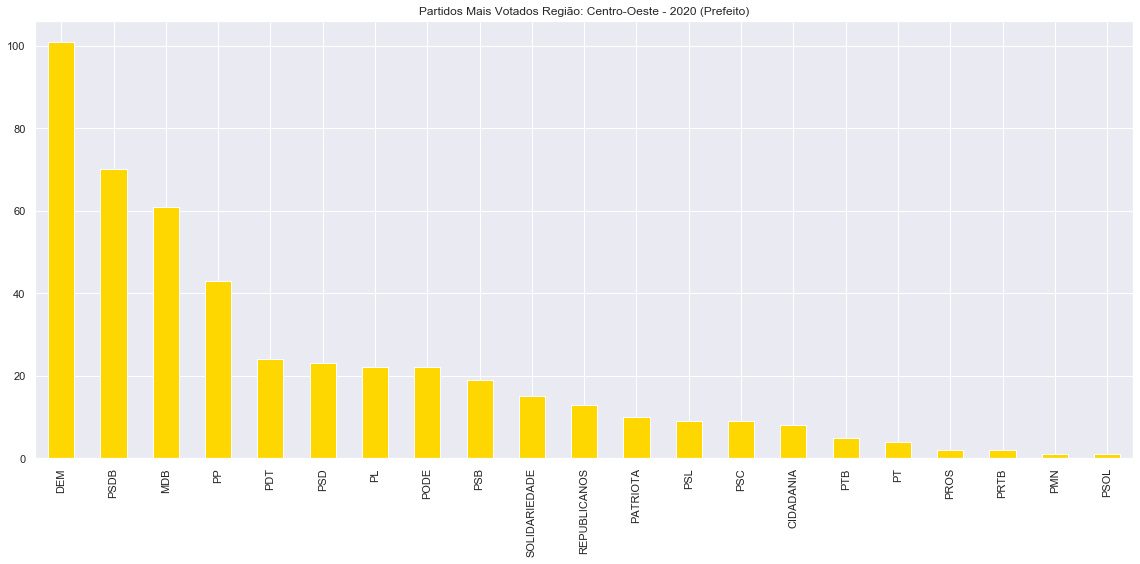

In [18]:
centro_oeste_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', figsize=(16,8), color= ['Gold'], title=f'Partidos Mais Votados Região: Centro-Oeste - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Centro-Oeste 2020.png', dpi=300)

In [19]:
#Concatenação dos arquivos .csv pertencentes a região Sul.

path = r'C:\Users\Guilherme\Desktop\Data\SUL' # Caminho para arquivos
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 
    li.append(df)

sul = pd.concat(li, axis=0, ignore_index=True)

In [20]:
sul.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:21:15,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PR,78018,QUITANDINHA,78018,QUITANDINHA,11,13,Vereador,160000886730,23333,PRICILLA CAMARGO ANDRADE ZANONI,PRICILLA FARMACÊUTICA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,23,CIDADANIA,Cidadania,160000099287,PARTIDO ISOLADO,CIDADANIA,5,SUPLENTE,N,16
1,29/11/2020,10:21:15,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PR,75353,CURITIBA,75353,CURITIBA,3,13,Vereador,160001097918,45999,EDGAR MARCELO SANTOS,EDGAR MARCELO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,160000132999,PARTIDO ISOLADO,PSDB,4,NÃO ELEITO,N,12
2,29/11/2020,10:21:15,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PR,75353,CURITIBA,75353,CURITIBA,3,13,Vereador,160001143932,51033,JORGE DE MELLO MANCIO,JORGE MANCIO TEIXEIRINHA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,51,PATRIOTA,Patriota,160000138781,PARTIDO ISOLADO,PATRIOTA,5,SUPLENTE,N,0
3,29/11/2020,10:21:15,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PR,75353,CURITIBA,75353,CURITIBA,175,13,Vereador,160001139970,12007,EVERTON RODRIGUES PASSOS,PROFESSOR EVERTON,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,160000138278,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,37
4,29/11/2020,10:21:15,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PR,75353,CURITIBA,75353,CURITIBA,4,13,Vereador,160001139989,12128,VANESSA ANTONELLI ROSSETTO,VAN VEGANA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,160000138278,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,46


In [22]:
sul_mais_votados_2020 = sul[sul['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

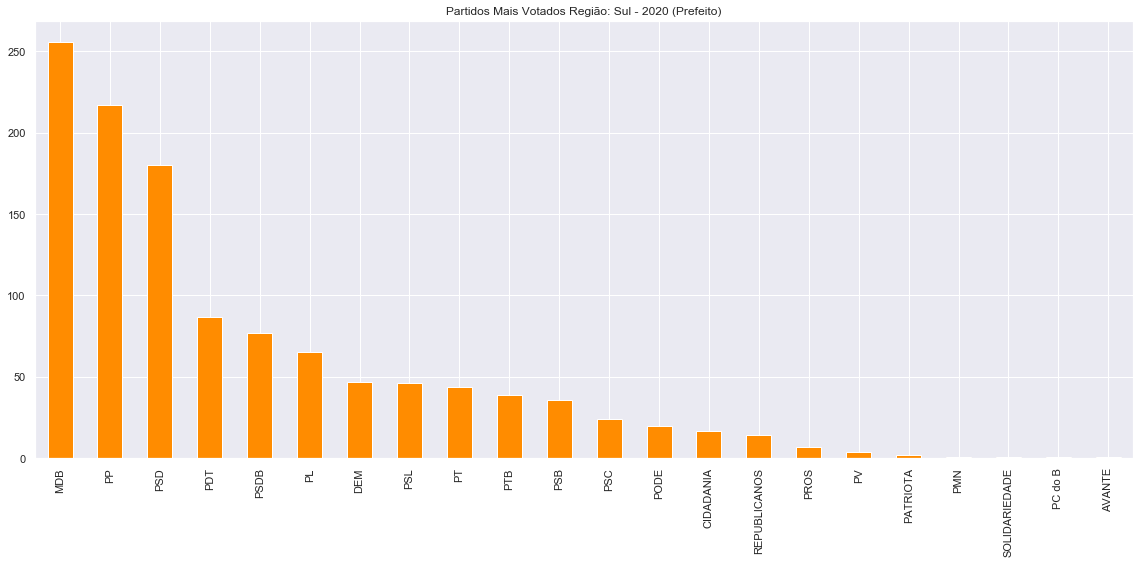

In [23]:
sul_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', color= ['DarkOrange'], figsize=(16,8), title=f'Partidos Mais Votados Região: Sul - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Sul 2020.png', dpi=300)

In [24]:
#Importação dados: Resultado Eleições Brasil

path = r'C:\Users\Guilherme\Desktop\Data\votacao_candidato_munzona_2020' # Caminho para arquivos

brasil = pd.read_csv(path + "/votacao_candidato_munzona_2020_BRASIL.csv", sep = ';', encoding = 'iso-8859-1', decimal=',' , index_col=None, header=0) 


In [25]:
brasil.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,29/11/2020,10:22:39,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,PA,4065,SÃO JOÃO DE PIRABAS,4065,SÃO JOÃO DE PIRABAS,64,13,Vereador,140001094353,10010,JOSÉ ARNALDO CRUZ,ARNALDO DA PARADA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,10,REPUBLICANOS,REPUBLICANOS,140000132569,PARTIDO ISOLADO,REPUBLICANOS,5,SUPLENTE,N,85
1,29/11/2020,10:22:39,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,RS,88994,SAPIRANGA,88994,SAPIRANGA,131,13,Vereador,210000768523,12111,AIRTON ANTUNES DA SILVA,AIRTON SILVA CHULE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,210000074274,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,148
2,29/11/2020,10:22:39,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,ES,57053,VITÓRIA,57053,VITÓRIA,52,13,Vereador,80000805832,12123,GILSON ANTUNES,GILSON ANTUNES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,12,PDT,Partido Democrático Trabalhista,80000079771,PARTIDO ISOLADO,PDT,5,SUPLENTE,N,12
3,29/11/2020,10:22:39,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,46418,ITACARAMBI,46418,ITACARAMBI,148,13,Vereador,130000931117,17777,WELLITON AUGUSTO PEREIRA DE SOUZA,WELLITON AUGUSTO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,17,PSL,Partido Social Liberal,130000107296,PARTIDO ISOLADO,PSL,3,ELEITO POR MÉDIA,N,169
4,29/11/2020,10:22:39,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,CE,13897,FORTALEZA,13897,FORTALEZA,95,13,Vereador,60000785473,25666,MARCIO AURELIO FREITAS MOREIRA,MARCIO FREITAS,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,25,DEM,Democratas,60000076429,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,14


In [26]:
brasil_mais_votados_2020 = brasil[brasil['DS_CARGO']== 'Prefeito']\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

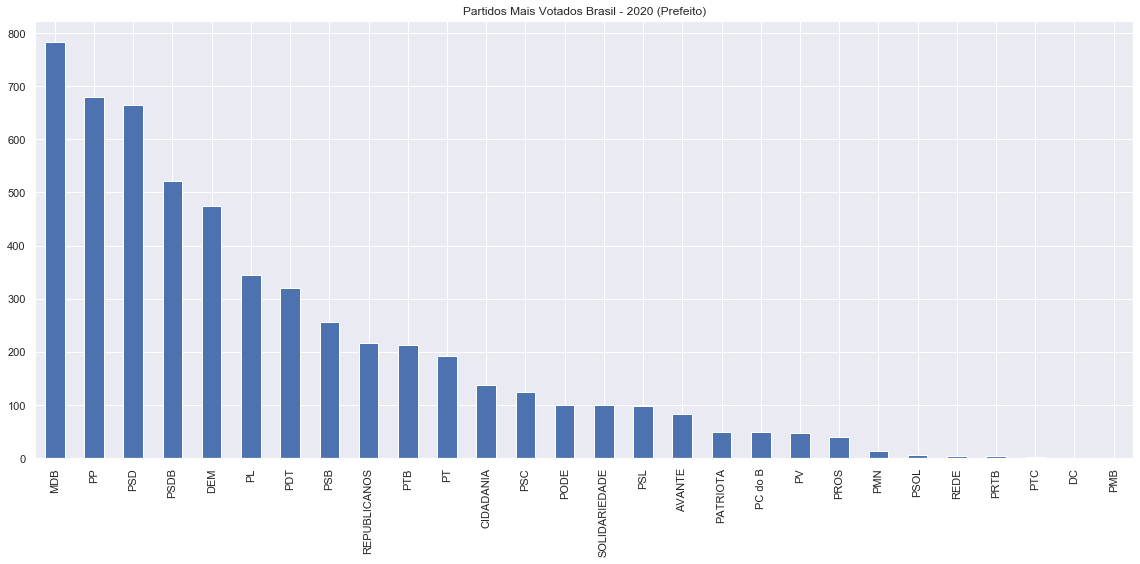

In [27]:
brasil_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', figsize=(16,8), title=f'Partidos Mais Votados Brasil - 2020 (Prefeito)');
plt.tight_layout()
plt.savefig('Partidos mais votados Brasil 2020.png', dpi=300)

In [28]:
candidatos_brasil = pd.read_csv(r'C:\Users\Guilherme\Desktop\Data\consulta_cand_2020\consulta_cand_2020_BRASIL.csv', sep = ';', encoding = 'iso-8859-1')

Z:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
candidatos_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557366 entries, 0 to 557365
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DT_GERACAO                     557366 non-null  object 
 1   HH_GERACAO                     557366 non-null  object 
 2   ANO_ELEICAO                    557366 non-null  int64  
 3   CD_TIPO_ELEICAO                557366 non-null  int64  
 4   NM_TIPO_ELEICAO                557366 non-null  object 
 5   NR_TURNO                       557366 non-null  int64  
 6   CD_ELEICAO                     557366 non-null  int64  
 7   DS_ELEICAO                     557366 non-null  object 
 8   DT_ELEICAO                     557366 non-null  object 
 9   TP_ABRANGENCIA                 557366 non-null  object 
 10  SG_UF                          557366 non-null  object 
 11  SG_UE                          557366 non-null  int64  
 12  NM_UE                         

In [30]:
candidatos_brasil['CD_CARGO'].value_counts()

13    518316
12     19708
11     19342
Name: CD_CARGO, dtype: int64

In [31]:
#11 prefeito
#12 vice-prefeito
#13 vereador

In [32]:
pref_vice = candidatos_brasil[(candidatos_brasil['CD_CARGO']==11)|(candidatos_brasil['CD_CARGO']==12)]

In [33]:
inaptos_pref_vice = pref_vice[(pref_vice['DS_SITUACAO_CANDIDATURA']=='INAPTO')]

In [34]:
inaptos_pref_vice['DS_CARGO'].value_counts()

VICE-PREFEITO    936
PREFEITO         575
Name: DS_CARGO, dtype: int64

In [35]:
pref_vice['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                            34786
DEFERIDO COM RECURSO                 1107
INDEFERIDO COM RECURSO                980
RENÚNCIA                              788
INDEFERIDO                            529
PENDENTE DE JULGAMENTO                452
AGUARDANDO JULGAMENTO                 208
PEDIDO NÃO CONHECIDO                  103
CANCELADO                              78
FALECIDO                               13
CASSADO COM RECURSO                     5
PEDIDO NÃO CONHECIDO COM RECURSO        1
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [36]:
#Limpeza dos dados, remoção de candidatos indeferidos.

candidatos = pref_vice[(pref_vice['DS_DETALHE_SITUACAO_CAND'] == 'AGUARDANDO JULGAMENTO')|
                       (pref_vice['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO')|
                       (pref_vice['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')]

In [37]:
pref_vice_aptos = candidatos.drop_duplicates(subset = ['CD_CARGO', 'NR_CANDIDATO', 'SG_UE'], keep = 'last', ignore_index=True)

In [38]:
pref_vice_aptos['DS_CARGO'].value_counts()

VICE-PREFEITO    18155
PREFEITO         17943
Name: DS_CARGO, dtype: int64

In [39]:
vereador = candidatos_brasil[(candidatos_brasil['CD_CARGO']==13)]

In [40]:
vereador['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                            481666
INDEFERIDO COM RECURSO               11343
INDEFERIDO                            7619
RENÚNCIA                              7010
PENDENTE DE JULGAMENTO                4353
AGUARDANDO JULGAMENTO                 3062
DEFERIDO COM RECURSO                  2844
PEDIDO NÃO CONHECIDO                   192
FALECIDO                               115
CANCELADO                               81
PEDIDO NÃO CONHECIDO COM RECURSO        21
CANCELADO COM RECURSO                    9
CASSADO COM RECURSO                      1
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [41]:
vereadores_aptos = vereador[(vereador['DS_DETALHE_SITUACAO_CAND'] == 'AGUARDANDO JULGAMENTO')|
                       (vereador['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO')|
                       (vereador['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')]

In [42]:
vereadores_aptos = vereadores_aptos.drop_duplicates(subset = ['CD_CARGO', 'NR_CANDIDATO', 'SG_UE'], keep = 'last', ignore_index=True)

In [43]:
vereadores_aptos['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                 481665
AGUARDANDO JULGAMENTO      3061
DEFERIDO COM RECURSO       2844
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

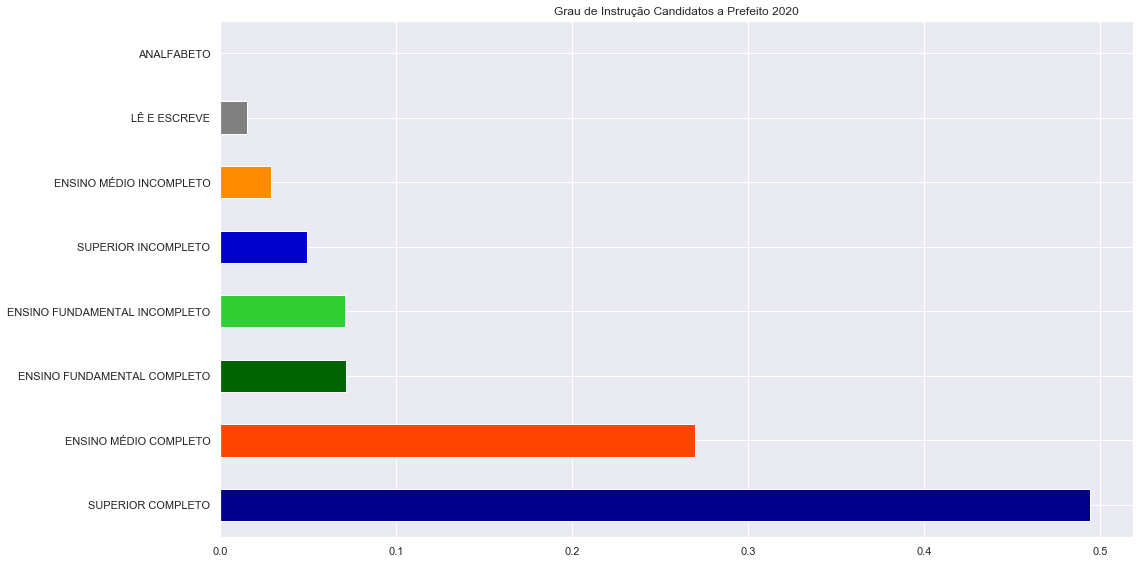

In [44]:
pref_vice_aptos['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='barh', color=['DarkBlue', 'OrangeRed', 'DarkGreen', 'LimeGreen', 'MediumBlue', 'DarkOrange', 'Gray'], figsize=(16,8), title ='Grau de Instrução Candidatos a Prefeito 2020');
plt.tight_layout()
plt.savefig('Grau de Instrução Candidatos a Prefeito.png', dpi=300)

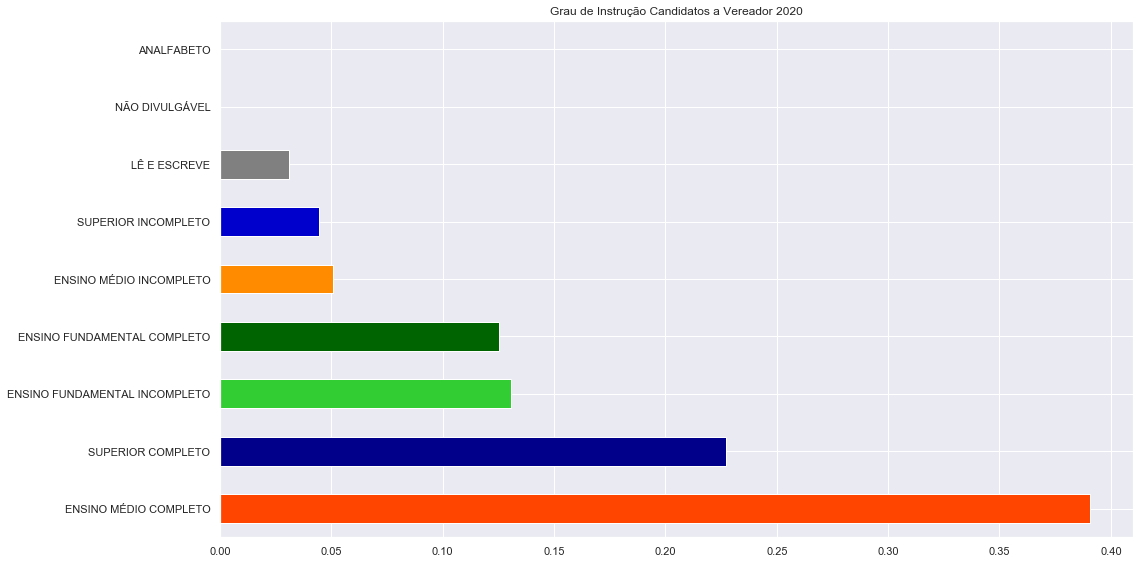

In [45]:
vereadores_aptos['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='barh', figsize=(16,8), color=['OrangeRed', 'DarkBlue', 'LimeGreen', 'DarkGreen', 'DarkOrange', 'MediumBlue', 'Gray'], title ='Grau de Instrução Candidatos a Vereador 2020');
plt.tight_layout()
plt.savefig('Grau de Instrução Candidatos a Vereador.png', dpi=300)

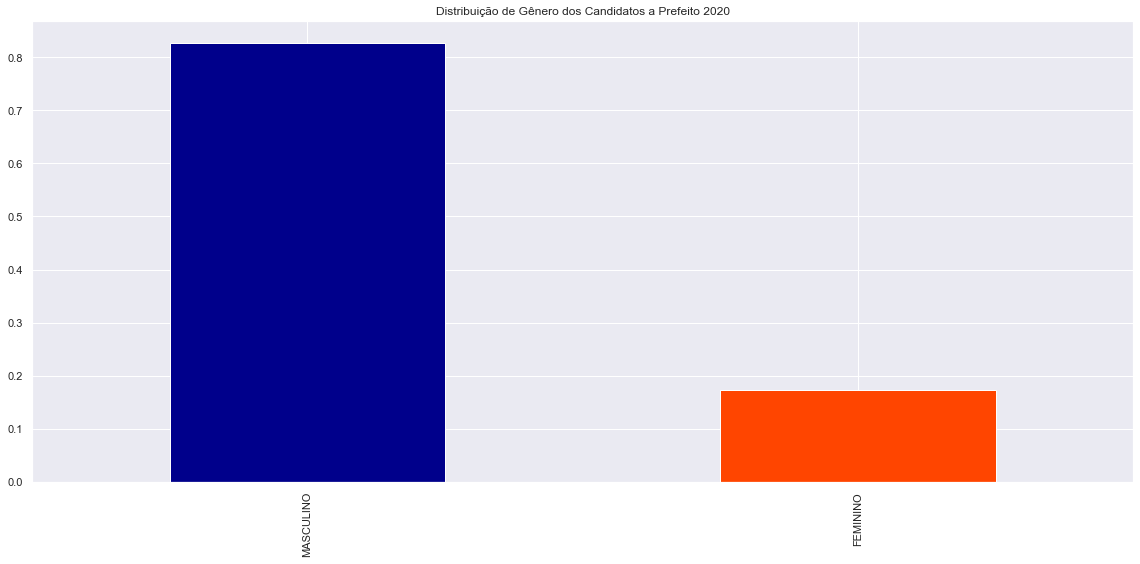

In [46]:
pref_vice_aptos['DS_GENERO'].value_counts(normalize=True).plot(kind='bar', figsize=(16,8), color=['DarkBlue', 'OrangeRed'], title ='Distribuição de Gênero dos Candidatos a Prefeito 2020');
plt.tight_layout()
plt.savefig('Genero Candidatos a Prefeito.png', dpi=300)

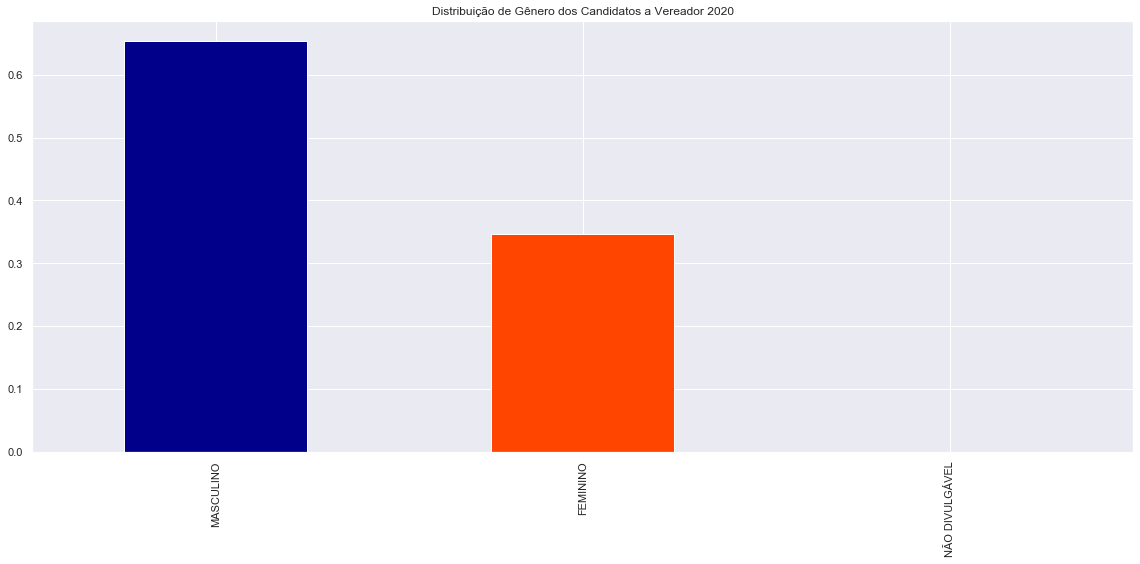

In [47]:
vereadores_aptos['DS_GENERO'].value_counts(normalize=True).plot(kind='bar', figsize=(16,8), color=['DarkBlue', 'OrangeRed'], title ='Distribuição de Gênero dos Candidatos a Vereador 2020');
plt.tight_layout()
plt.savefig('Genero Candidatos a Vereador.png', dpi=300)

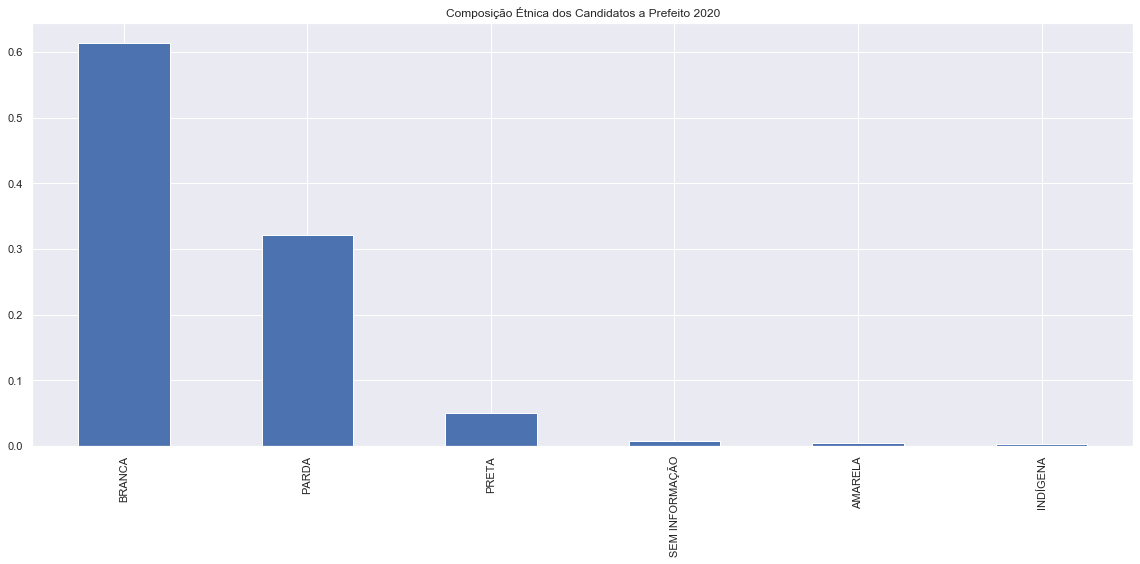

In [48]:
pref_vice_aptos['DS_COR_RACA'].value_counts(normalize=True).plot(kind='bar', figsize=(16,8), title ='Composição Étnica dos Candidatos a Prefeito 2020');
plt.tight_layout()
plt.savefig('Etnia Candidatos a Prefeito.png', dpi=300)

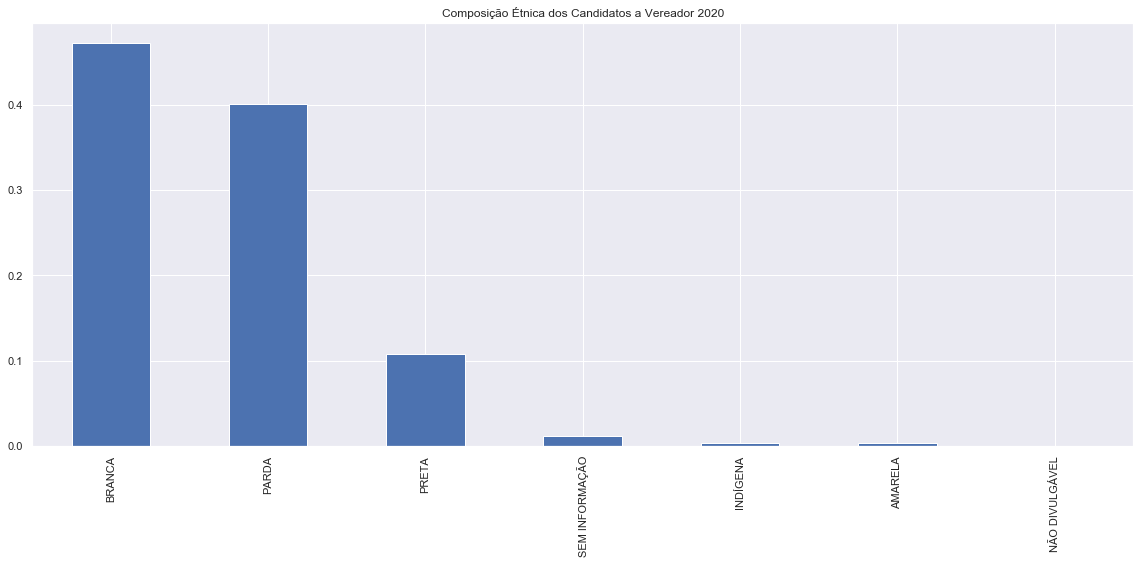

In [49]:
vereadores_aptos['DS_COR_RACA'].value_counts(normalize=True).plot(kind='bar', figsize=(16,8), title ='Composição Étnica dos Candidatos a Vereador 2020');
plt.tight_layout()
plt.savefig('Etnia Candidatos a Vereador.png', dpi=300)